<a href="https://colab.research.google.com/github/Tina-223/DBscan/blob/main/wholesale_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Purpose of Clusterizing
  - 

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv('Wholesale customers data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [7]:
scaled_X = StandardScaler().fit_transform(df)
scaled_X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

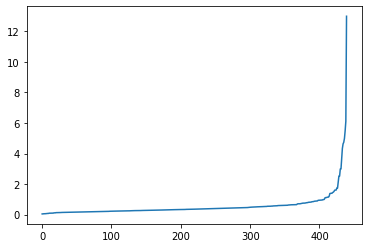

In [8]:
# Find Hyper Parameter
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [9]:
eps = 0.5
min_sample = 5

dbscan = DBSCAN(eps=eps,min_samples=min_sample)
clustering = dbscan.fit(scaled_X)

In [10]:
df.loc[:,'Cluster'] = clustering.labels_
df.Cluster.value_counts().to_frame()

,Cluster
0,261
-1,174
1,5


In [11]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,-1
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,0


In [12]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [13]:
cl

,cluster
0,0
1,0
2,-1
3,0
4,-1
...,...
435,-1
436,-1
437,-1
438,0


In [14]:
cl.value_counts()

cluster
 0         261
-1         174
 1           5
dtype: int64

In [15]:
pd.concat([df,cl],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,cluster
0,12669,9656,7561,214,2674,1338,0,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,-1,-1
3,13265,1196,4221,6404,507,1788,0,0
4,22615,5410,7198,3915,1777,5185,-1,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1,-1
436,39228,1431,764,4510,93,2346,-1,-1
437,14531,15488,30243,437,14841,1867,-1,-1
438,10290,1981,2232,1038,168,2125,0,0


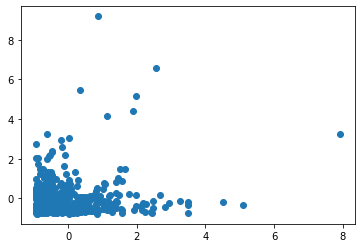

In [17]:
plt.scatter(scaled_X[:,0], scaled_X[:,1])

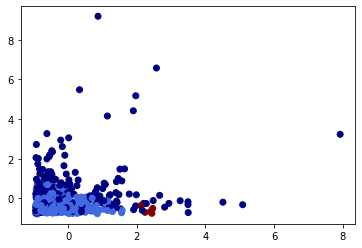

In [19]:
from matplotlib import pyplot as plt
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=vectorizer(dbscan.labels_))